In [1]:
import glob
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
df_balanced = pd.read_csv('data/ibtracs/ibtracs_gridsat_train.ss_bins.gini_0.10.max_freq_20000.max_upsample_50.csv')
df = pd.read_csv('data/ibtracs/ibtracs_gridsat_train.csv')
df_test = pd.read_csv('data/ibtracs/ibtracs_gridsat_test2.csv')

# Categorizing WMO_WIND according to the extended Saffir-Simpson scale
def categorize_wind_speed(wind_speed):
    if wind_speed < 34:
        return 0
    elif 34 <= wind_speed <= 63:
        return 1
    elif 64 <= wind_speed <= 82:
        return 2
    elif 83 <= wind_speed <= 95:
        return 3
    elif 96 <= wind_speed <= 112:
        return 4
    elif 113 <= wind_speed <= 135:
        return 5
    else: # wind_speed > 135
        return 6
    
def categorize_hemisphere(latitude):
    if latitude < 0:
        return 'SH'
    else:
        return 'NH'

# Applying the categorization to the dataframe
df['Wind_Category'] = df['WMO_WIND'].apply(categorize_wind_speed)

# Define the order of categories
categories = [
    0, 1, 2, 3, 4, 5, 6
]

# Convert the 'Wind_Category' column to a categorical type with the specified order
df['Wind_Category'] = pd.Categorical(
    df['WMO_WIND'].apply(categorize_wind_speed),
    categories=categories,
    ordered=True
)

# Convert the 'Wind_Category' column to a categorical type with the specified order
df_balanced['Wind_Category'] = pd.Categorical(
    df_balanced['WMO_WIND'].apply(categorize_wind_speed),
    categories=categories,
    ordered=True
)

# Convert the 'Wind_Category' column to a categorical type with the specified order
df_test['Wind_Category'] = pd.Categorical(
    df_test['WMO_WIND'].apply(categorize_wind_speed),
    categories=categories,
    ordered=True
)


# Now when you plot, the categories should appear in the defined order.

df['Hemisphere'] = df['LAT'].apply(categorize_hemisphere)

df_nh = df.loc[df['Hemisphere'] == 'NH']
df_sh = df.loc[df['Hemisphere'] == 'SH']

C:\Users\ascen\AppData\Local\Temp\ipykernel_10312\621740572.py:8: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_balanced = pd.read_csv('data/ibtracs/ibtracs_gridsat_train.ss_bins.gini_0.10.max_freq_20000.max_upsample_50.csv')
C:\Users\ascen\AppData\Local\Temp\ipykernel_10312\621740572.py:9: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/ibtracs/ibtracs_gridsat_train.csv')


# Global histograms

C:\Users\ascen\AppData\Local\Temp\ipykernel_10312\3536110420.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['Wind_Category'], bins=bins_saffir_simpson, kde=False,


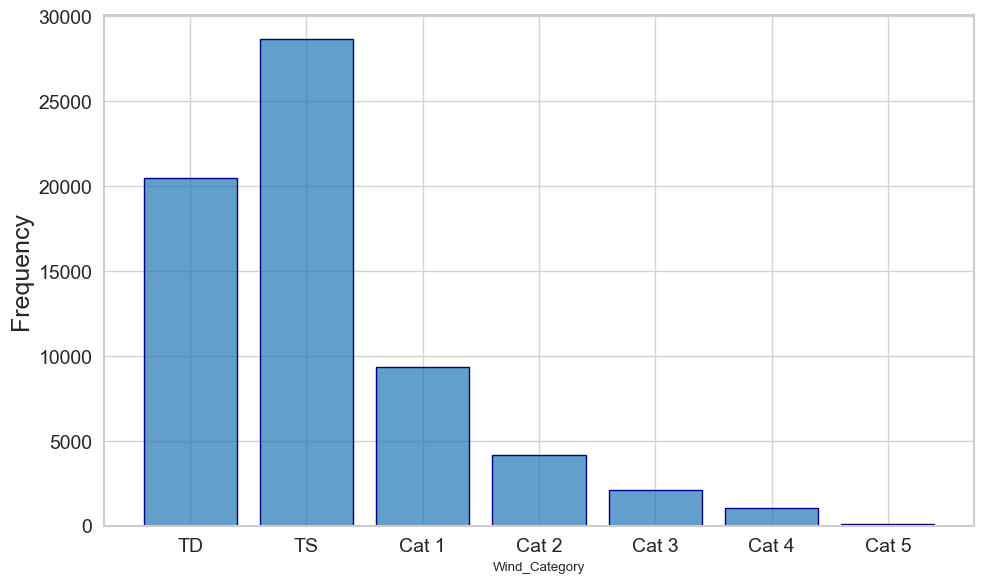

In [2]:
# Setting up the style using seaborn
sns.set_style("whitegrid", {"grid.color": ".9"})
sns.set_context("paper", font_scale=1, rc={"axes.linewidth": 1.5})

bins_saffir_simpson = [0, 34, 64, 83, 96, 113, 137, 200]  # Modify as necessary

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
palette = sns.color_palette("coolwarm", as_cmap=True)

# Creating the histogram with the 'shrink' parameter to add separation
sns.histplot(df['Wind_Category'], bins=bins_saffir_simpson, kde=False, 
             palette=palette, edgecolor="navy", linewidth=1, shrink=0.8, label='Original (Gini = 0.57)', alpha=0.7)

# sns.histplot(df_balanced['Wind_Category'], bins=bins_saffir_simpson, kde=False, 
#              palette=palette, edgecolor="crimson", linewidth=1, shrink=0.8, label='Balanced (Gini = 0.10)', alpha=0.7)

# Enhancing overall aesthetics
sns.set(style="whitegrid")
plt.ylabel('Frequency', fontsize=18)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['TD', 'TS', 'Cat 1', 'Cat 2', 'Cat 3', 'Cat 4', 'Cat 5'], fontsize=14)  # Update this line
plt.yticks(fontsize=14)
plt.grid(color='lightgray', linestyle='-', linewidth=1)
plt.tight_layout()

# Show the plot with separated bars
plt.show()

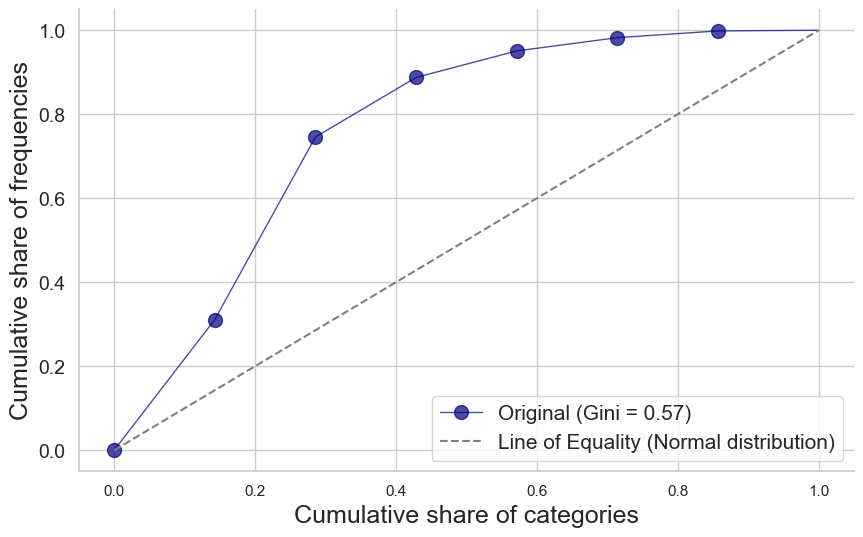

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'frequencies' is a list or array with the frequencies for each Saffir-Simpson category
frequencies = np.array(df['Wind_Category'].value_counts(sort=False))  # Replace with your actual data
frequencies_balanced = np.array(df_balanced['Wind_Category'].value_counts(sort=False))  # Replace with your actual data

# Calculate the cumulative percentage of total frequencies (Lorenz curve values)
cum_freq = np.cumsum(frequencies)
cum_freq_balanced = np.cumsum(frequencies_balanced)
total_freq = cum_freq[-1]
total_freq_balanced = cum_freq_balanced[-1]
lorenz_curve = np.insert(cum_freq / total_freq, 0, 0)  # Include 0 at the beginning
lorenz_curve_balanced = np.insert(cum_freq_balanced / total_freq_balanced, 0, 0)  # Include 0 at the beginning

# Prepare Lorenz curve points
x_lorenz = np.linspace(0, 1, len(lorenz_curve))  # Evenly spaced x values between 0 and 1 including 0
x_lorenz_balanced = np.linspace(0, 1, len(lorenz_curve_balanced))  # Evenly spaced x values between 0 and 1 including 0

# Plotting the Lorenz curve
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plt.plot(x_lorenz, lorenz_curve, color='Navy', label='Original (Gini = 0.57)', linewidth=1, alpha=0.7, marker='o', markevery=0.1, markersize=10)
#plt.plot(x_lorenz_balanced, lorenz_curve_balanced, color='green', label='Balanced (Gini = 0.10)', linewidth=1, alpha=0.7, marker='o', markevery=0.1, markersize=10)

plt.plot([0,1], [0,1], color='grey', linestyle='--', label='Line of Equality (Normal distribution)')  # Equality line

# Enhancing plot aesthetics
plt.xlabel('Cumulative share of categories', fontsize=18)
plt.ylabel('Cumulative share of frequencies', fontsize=18)
plt.legend(fontsize=15)
plt.yticks(fontsize=14)
plt.yticks(fontsize=14)
# Adding subtle artistic elements
ax.spines['right'].set_visible(False)
ax.spines['top']. set_visible(False)

plt.show()


# NH histograms

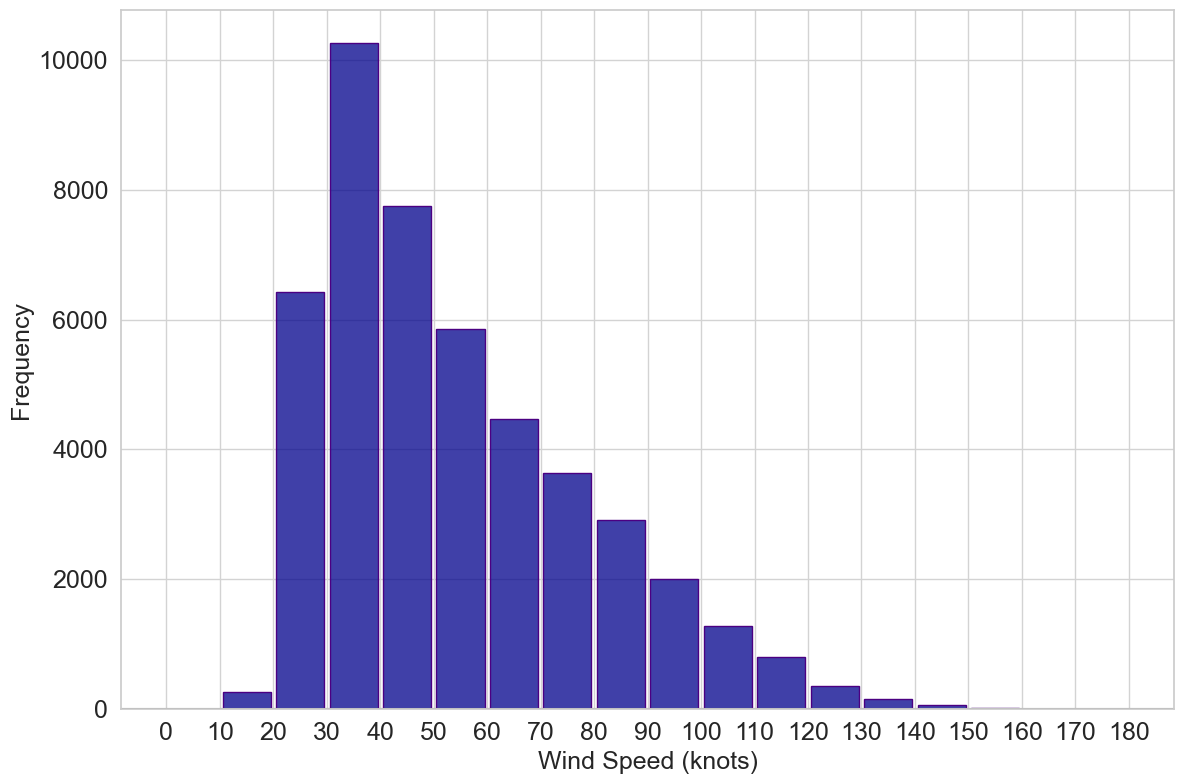

In [4]:
# Iterating to create a more aesthetically pleasing histogram
plt.figure(figsize=(12, 8))

# Choosing a more harmonious and sophisticated color palette
palette = sns.color_palette("viridis", as_cmap=True)
sns.histplot(df_nh['WMO_WIND'], bins=range(0, 190, 10), kde=False, 
             color="darkblue", edgecolor="indigo", linewidth=1, shrink=0.9)

# # Representing Saffir-Simpson categories with vertical lines and text labels for subtlety
# for category, (start, end) in categories.items():
#     plt.axvline(x=start, color=category_colors[category], linestyle='--', linewidth=2)
#     plt.text(start + 1, plt.ylim()[1] * 0.8, category, color=category_colors[category], rotation=45, fontsize=10)

# Enhancing overall aesthetics with a more professional look
sns.set(style="whitegrid")
plt.xlabel('Wind Speed (knots)', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(range(0, 190, 10), fontsize=18)
plt.yticks(fontsize=18)

# Adding subtle artistic elements
plt.grid(color='lightgrey', linestyle='-', linewidth=1)
plt.axhline(y=0, color='grey', linestyle='-')
plt.tight_layout()

# Show the updated plot
plt.show()

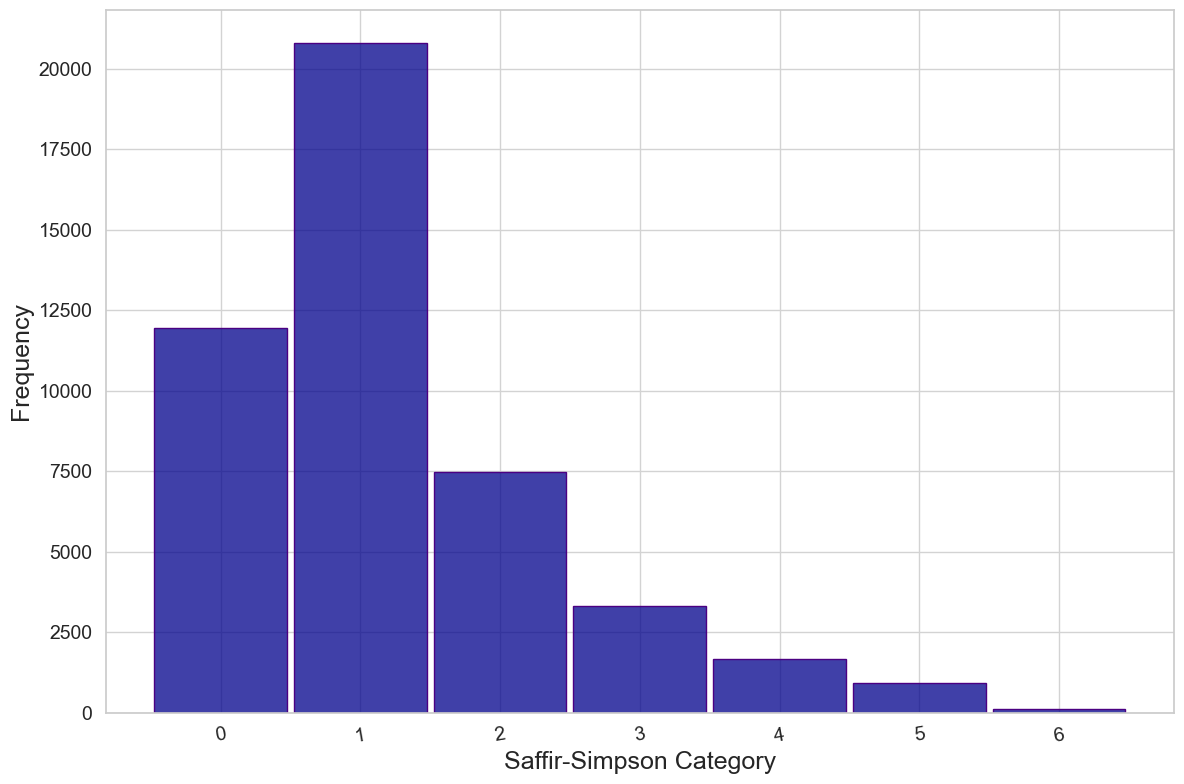

In [5]:
plt.figure(figsize=(12, 8))

# Creating the histogram with the 'shrink' parameter to add separation
sns.histplot(df_nh['Wind_Category'], kde=False, color="darkblue", edgecolor="indigo", linewidth=1, shrink=0.95)

# Enhancing overall aesthetics
sns.set(style="whitegrid")
plt.xlabel('Saffir-Simpson Category', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(rotation=10, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(color='lightgray', linestyle='-', linewidth=1)
plt.tight_layout()

# Show the plot with separated bars
plt.show()

# SH histograms

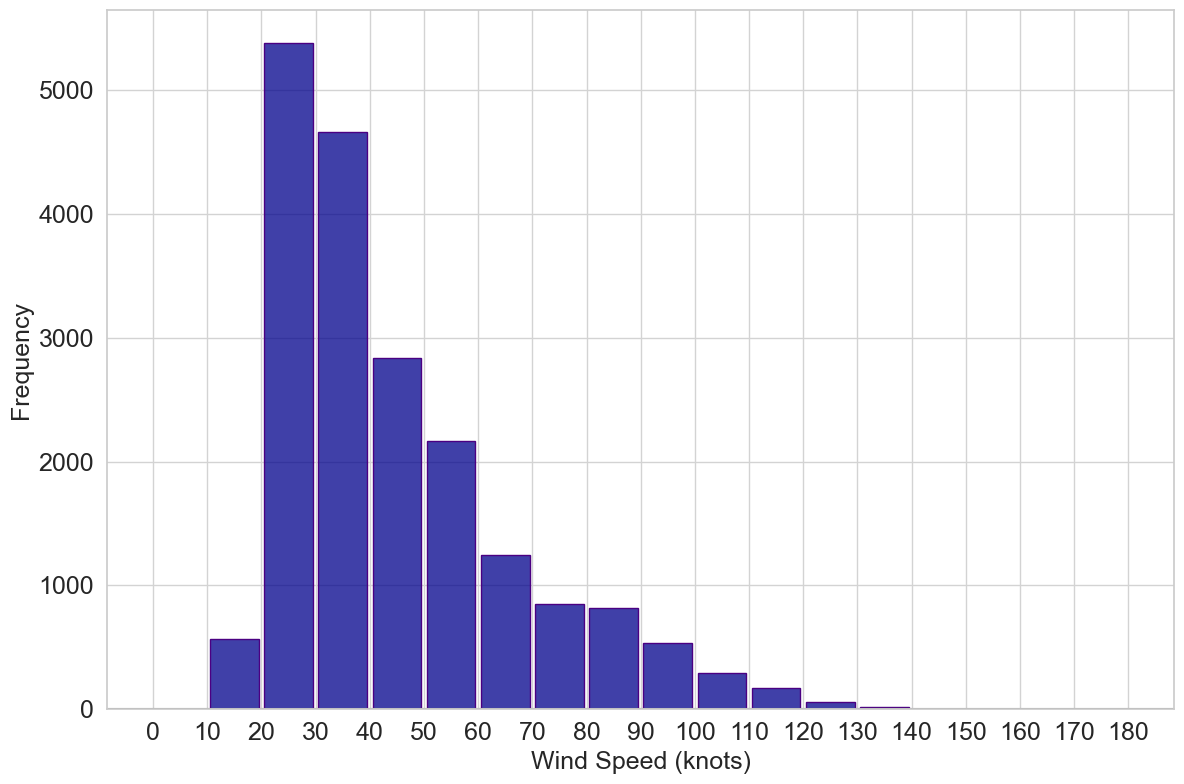

In [6]:
# Iterating to create a more aesthetically pleasing histogram
plt.figure(figsize=(12, 8))

# Choosing a more harmonious and sophisticated color palette
palette = sns.color_palette("viridis", as_cmap=True)
sns.histplot(df_sh['WMO_WIND'], bins=range(0, 190, 10), kde=False, 
             color="darkblue", edgecolor="indigo", linewidth=1, shrink=0.9)

# # Representing Saffir-Simpson categories with vertical lines and text labels for subtlety
# for category, (start, end) in categories.items():
#     plt.axvline(x=start, color=category_colors[category], linestyle='--', linewidth=2)
#     plt.text(start + 1, plt.ylim()[1] * 0.8, category, color=category_colors[category], rotation=45, fontsize=10)

# Enhancing overall aesthetics with a more professional look
sns.set(style="whitegrid")
plt.xlabel('Wind Speed (knots)', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(range(0, 190, 10), fontsize=18)
plt.yticks(fontsize=18)

# Adding subtle artistic elements
plt.grid(color='lightgrey', linestyle='-', linewidth=1)
plt.axhline(y=0, color='grey', linestyle='-')
plt.tight_layout()

# Show the updated plot
plt.show()

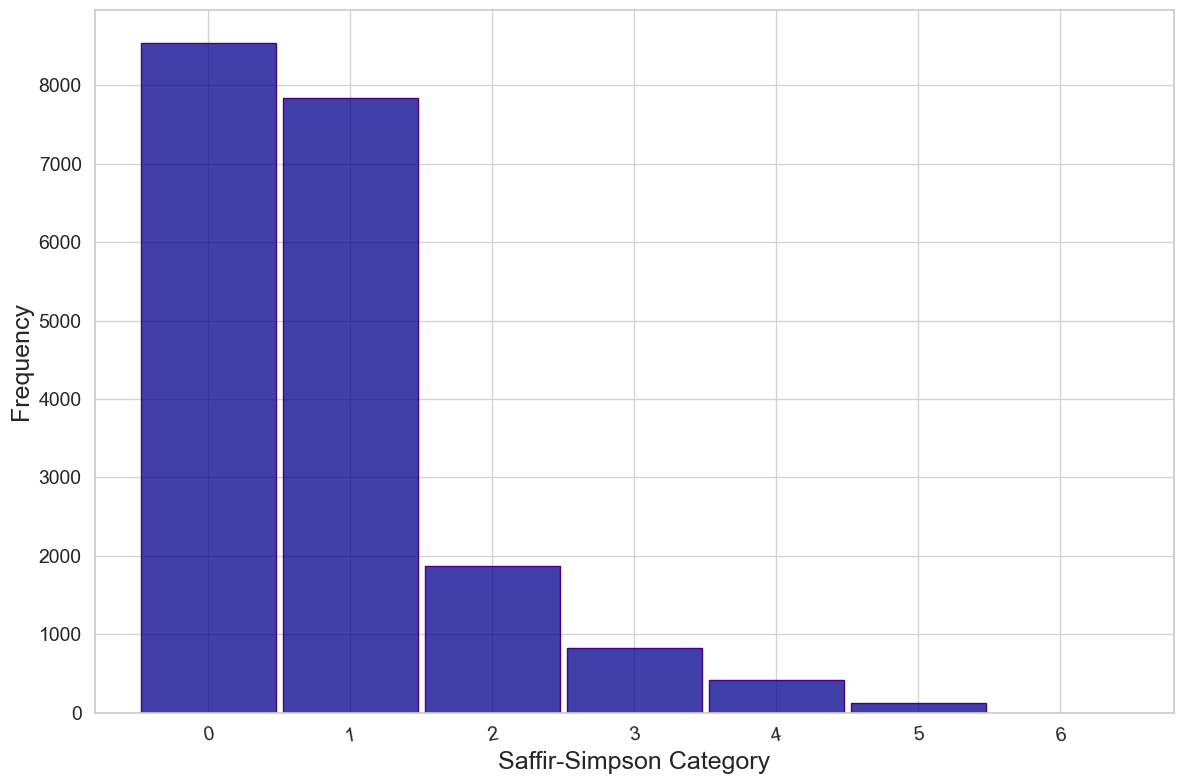

In [7]:
plt.figure(figsize=(12, 8))

# Creating the histogram with the 'shrink' parameter to add separation
sns.histplot(df_sh['Wind_Category'], kde=False, color="darkblue", edgecolor="indigo", linewidth=1, shrink=0.95)

# Enhancing overall aesthetics
sns.set(style="whitegrid")
plt.xlabel('Saffir-Simpson Category', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(rotation=10, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(color='lightgray', linestyle='-', linewidth=1)

# Dynamically setting the x-axis limits with padding
# Calculate the number of unique categories and set xlim accordingly
n_categories = len(df_sh['Wind_Category'].cat.categories)
plt.xlim(-0.5, n_categories - 0.5)

# Adding padding to the xlim
pad = 0.8  # This padding value can be adjusted if needed
plt.xlim(-pad, n_categories - 1 + pad)

plt.tight_layout()

# Show the plot with adjusted x-axis limits and padding
plt.show()

# Train-Test split

In [8]:
from sklearn.model_selection import train_test_split

# Define the Saffir-Simpson extended scale bins
bins = [0, 33, 63, 82, 95, 112, 136, df['WMO_WIND'].max()]
labels = ['Tropical Disturbance', 'Tropical Storm', 'Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5']
df['wind_category'] = pd.cut(df['WMO_WIND'], bins=bins, labels=labels, include_lowest=True)

# Check to make sure we don't have any bins with less than 2 samples
bin_counts = df['wind_category'].value_counts()
if any(bin_counts < 2):
    raise ValueError('One of the categories has fewer than 2 samples, which is not suitable for stratified splitting.')

# Perform the stratified split
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['wind_category'])
#train_df.to_csv('data/ibtracs/ibtracs_gridsat_train.csv', index=False)
#test_df.to_csv('data/ibtracs/ibtracs_gridsat_test.csv', index=False)

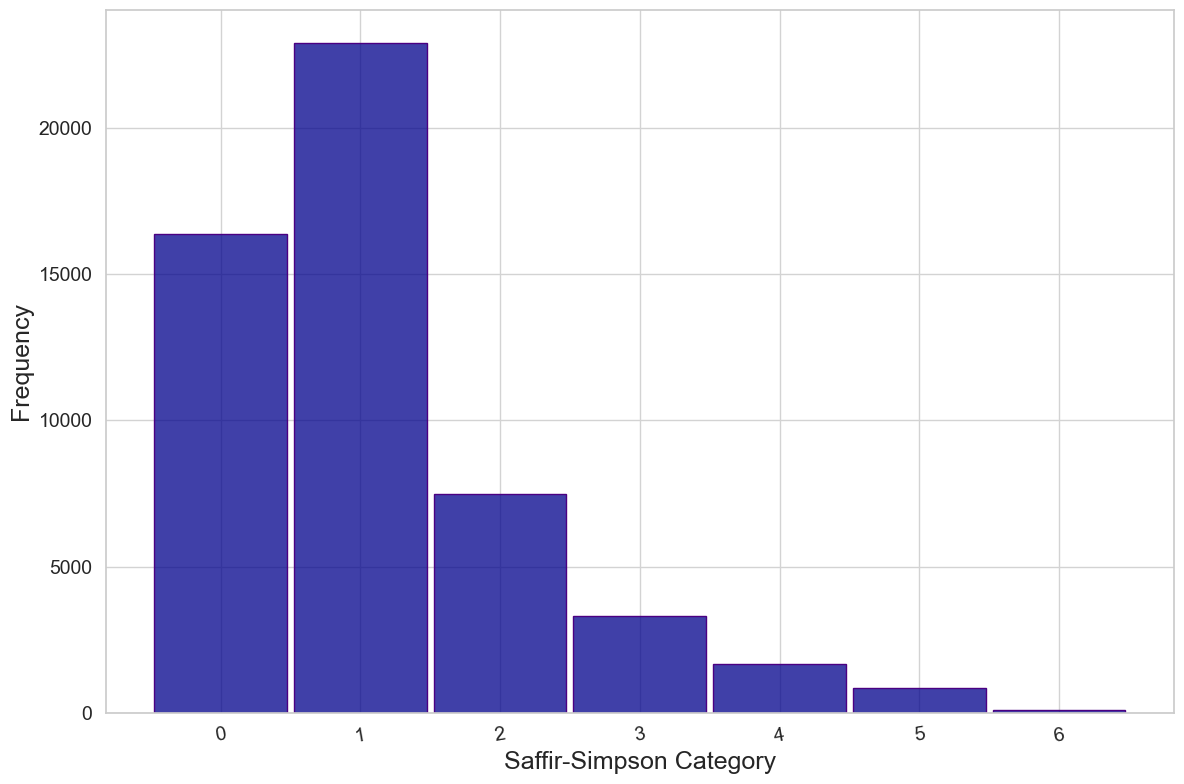

In [9]:
plt.figure(figsize=(12, 8))

# Creating the histogram with the 'shrink' parameter to add separation
sns.histplot(train_df['Wind_Category'], kde=False, color="darkblue", edgecolor="indigo", linewidth=1, shrink=0.95)

# Enhancing overall aesthetics
sns.set(style="whitegrid")
plt.xlabel('Saffir-Simpson Category', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(rotation=10, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(color='lightgray', linestyle='-', linewidth=1)
plt.tight_layout()

# Show the plot with separated bars
plt.show()

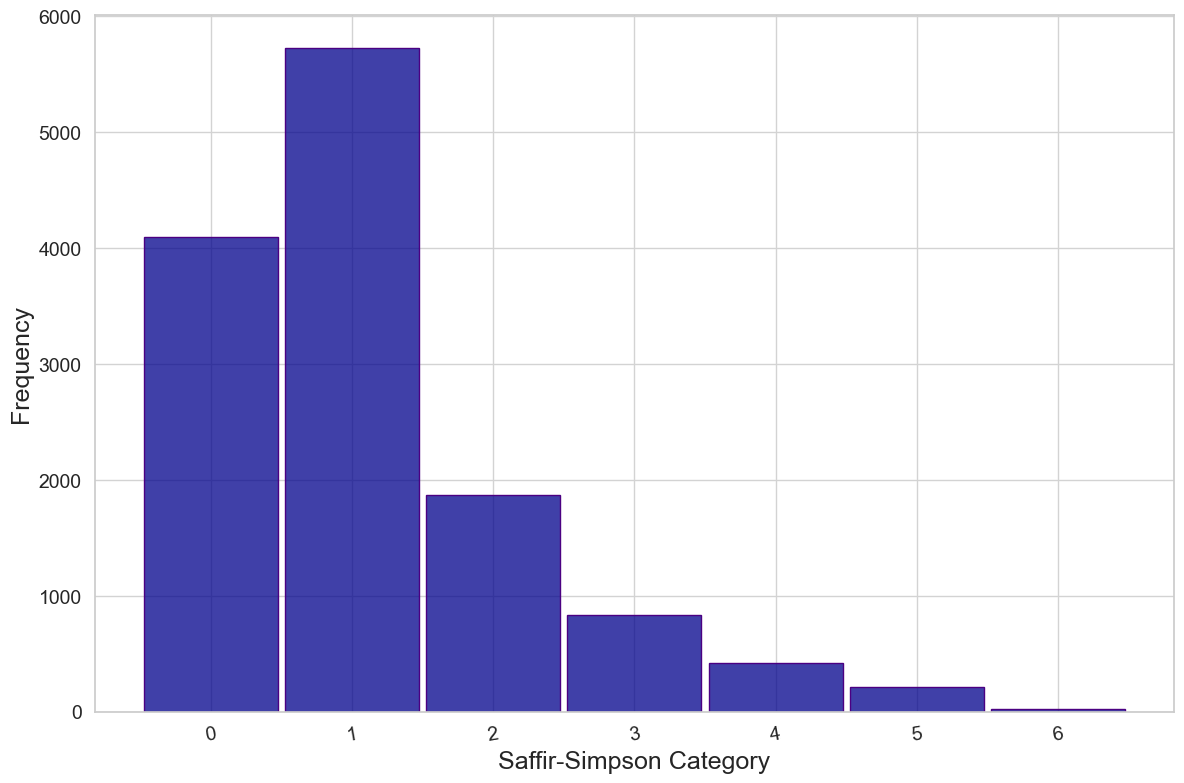

In [10]:
plt.figure(figsize=(12, 8))

# Creating the histogram with the 'shrink' parameter to add separation
sns.histplot(test_df['Wind_Category'], kde=False, color="darkblue", edgecolor="indigo", linewidth=1, shrink=0.95)

# Enhancing overall aesthetics
sns.set(style="whitegrid")
plt.xlabel('Saffir-Simpson Category', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(rotation=10, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(color='lightgray', linestyle='-', linewidth=1)
plt.tight_layout()

# Show the plot with separated bars
plt.show()